In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib 
import matplotlib.pyplot as plt


0.28836562294756873
3322


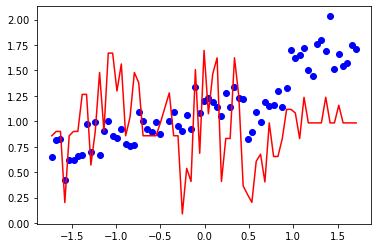

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn import preprocessing 


# Initialisation du modèle
model = KNeighborsRegressor(n_neighbors=2, weights='uniform')

# Importation des données 
df = pd.read_csv('Irish_synchrone_sample7_train.csv', sep=";")
X = df.loc[:,['TempMean', 'TempMin','TempMax', 'WindSpeed', 'WindSpeedMaxS','WindSpeedMaxG','Precip','Time','Posan','Instant']]
y = df['mean']

#création du dataset de train et test
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
limit = int(len(y)*0.8)
x_train, x_test = preprocessing.scale(X[:limit]), preprocessing.scale(X[limit:])
y_train, y_test = preprocessing.scale(y[:limit]), preprocessing.scale(y[limit:])

#Entrainement du modèle
model.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,model.predict(x_test)))


y_predicted = model.predict(x_test)
X_test = [ x_test[i][7] for i in range (len(x_test))]
#on trie les y par rapport aux X puis on affiche les données triées
plt.scatter(X_test[5::48], y_test[5::48], c="blue")
plt.plot(X_test[5::48], y_predicted[5::48], c="red")

print(len(y_predicted))
#On trace la courbe des prédictions


#plt.scatter(X_test, y_test, color="blue", label="data")
#plt.plot(x_test['Time'][0:200], y_predicted[0:200], color="darkorange", label="data")


In [ ]:
df_predict = pd.read_csv('Irish_synchrone_sample7_to_predict_na.csv', sep=";")
X_to_predict = df_predict.loc[:,['TempMean', 'TempMin','TempMax', 'WindSpeed','WindSpeedMaxS','WindSpeedMaxG','Precip','Time','Posan','Instant']]
X_to_predict_time = X_to_predict['Time']
y2_predicted = model.predict(X_to_predict)


In [ ]:
plt.scatter(X_to_predict_time, y2_predicted, color="green", label="data")

In [ ]:
print(X_to_predict)